In [1]:
clear
clc
pwd

ans = '/rds/general/user/ip620/home'

In [2]:
one = load("/rds/general/user/ip620/home/mri_fyp/brain/sequence/resultImage_TE47us_TI360ms.mat");
two = load("/rds/general/user/ip620/home/mri_fyp/brain/sequence/resultImage_TE800us_TI360ms.mat");
three = load("/rds/general/user/ip620/home/mri_fyp/brain/sequence/resultImage_TE1750us_TI360ms.mat");
four = load("/rds/general/user/ip620/home/mri_fyp/brain/sequence/resultImage_TE1750us_TI350ms.mat");
five = load("/rds/general/user/ip620/home/mri_fyp/brain/sequence/resultImage_TE1750us_TI370ms.mat");
six = load("/rds/general/user/ip620/home/mri_fyp/brain/sequence/resultImage_TE1750us_TI380ms.mat");

%%
% Assuming the variable containing the 3D image data is named 'resultImage' in each file
images = {one.resultImage, two.resultImage, three.resultImage, four.resultImage, five.resultImage, six.resultImage};

In [3]:
three_avg = mean(images{3},'all')
four_avg = mean(images{4},'all')
five_avg = mean(images{5},'all')
six_avg = mean(images{6},'all')

three_avg = 8.8551e-05

four_avg = 8.3179e-05

five_avg = 9.2801e-05

six_avg = 9.7478e-05

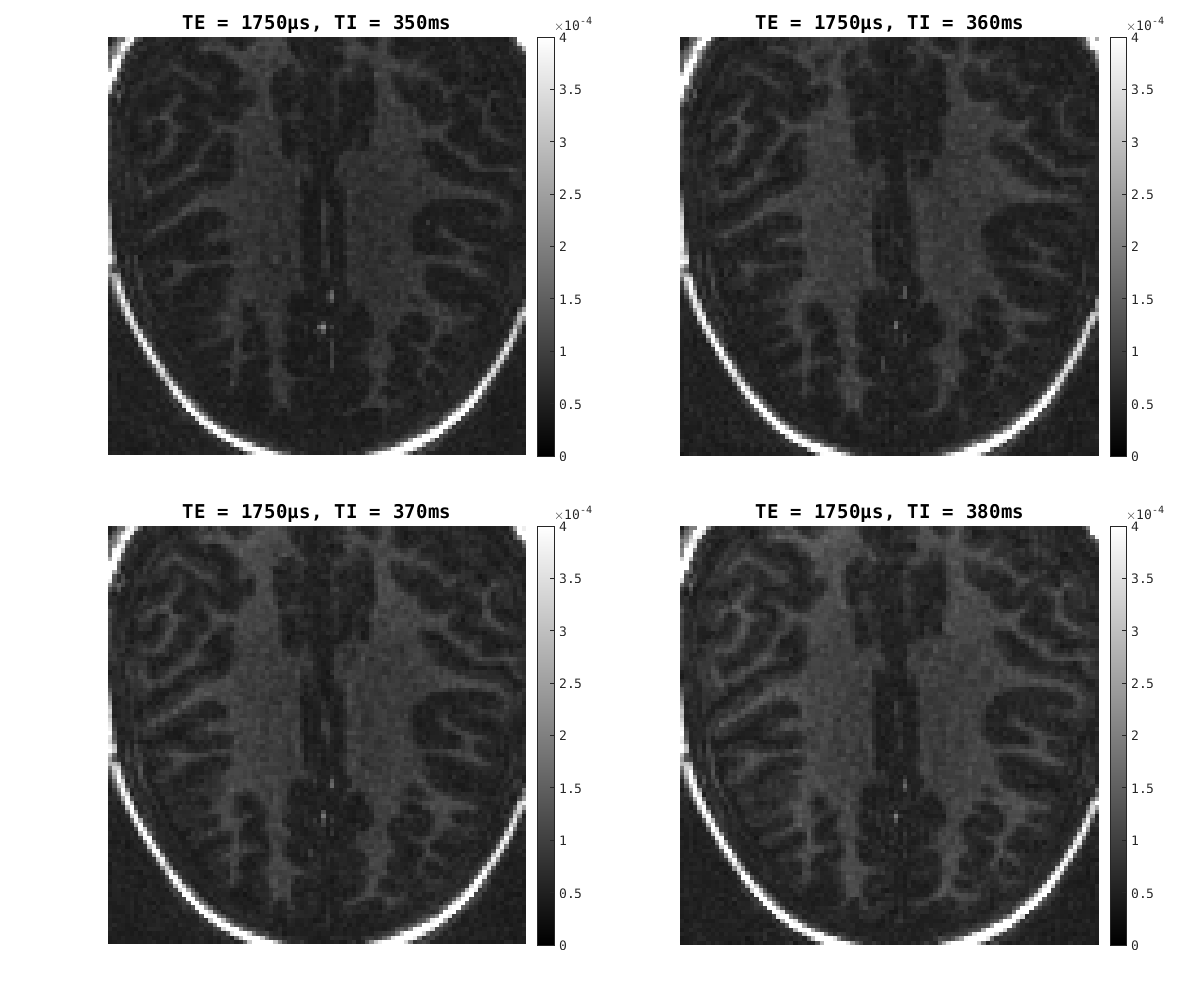

High-res figure saved to: /rds/general/user/ip620/home/mri_fyp/brain/sequence/inversion_times.jpg


In [9]:
% Reordered image set and titles based on TI
orderedImages = {images{4}, images{3}, images{5}, images{6}};
orderedTitles = {
    'TE = 1750μs, TI = 350ms', 
    'TE = 1750μs, TI = 360ms', 
    'TE = 1750μs, TI = 370ms', 
    'TE = 1750μs, TI = 380ms'
};

sliceNumber = 25;

% Create a tiled layout
fig = figure('Name', 'Slices Ordered by TI', 'NumberTitle', 'off', 'Position', [100, 100, 1200, 1000]);
tiledlayout(2, 2, 'Padding', 'compact', 'TileSpacing', 'compact');

for i = 1:4
    img = orderedImages{i};
    slice = squeeze(img(:, :, sliceNumber));

    nexttile;
    imagesc(abs(slice));
    axis image off;
    colormap('gray');
    caxis([0, 4e-4]);

    title(orderedTitles{i}, 'FontSize', 14);

    % Add individual colorbar
    colorbar;
end


% After plotting all subplots, save the whole figure
save_path = fullfile('/rds/general/user/ip620/home/mri_fyp/brain/sequence', 'inversion_times.jpg');  % Save to the current working directory
exportgraphics(gcf, save_path, 'Resolution', 300);  % 300 DPI

disp(['High-res figure saved to: ' save_path]);